# A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
 * Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  
* Let’s consider a Company dataset with around 10 variables and 400 records.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
from sklearn.metrics import classification_report

In [2]:
company=pd.read_csv('C:/Users/Osama Khan/OneDrive/Documents/Data Science/Assignment/Assignment 14/Company_Data.csv')
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


<AxesSubplot:xlabel='Sales'>

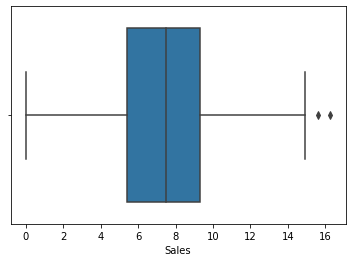

In [5]:
# Checking Outlier in numerical dataset
sns.boxplot(x='Sales',data=company )

<AxesSubplot:xlabel='CompPrice'>

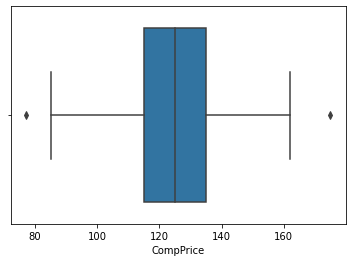

In [6]:
sns.boxplot(x='CompPrice',data=company)

<AxesSubplot:xlabel='Income'>

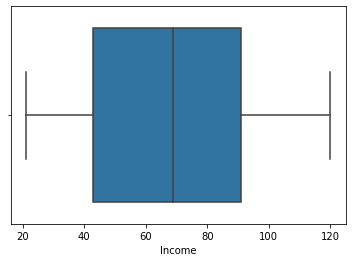

In [7]:
sns.boxplot(x='Income',data=company)

<AxesSubplot:xlabel='Advertising'>

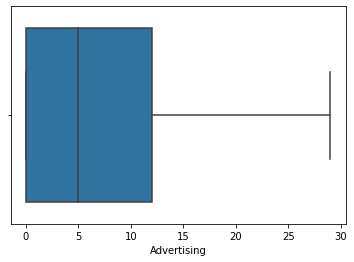

In [8]:
sns.boxplot(x='Advertising',data=company)

<AxesSubplot:xlabel='Population'>

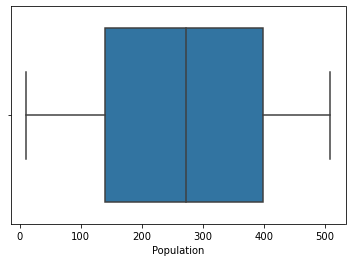

In [9]:
sns.boxplot(x='Population',data=company)

<AxesSubplot:xlabel='Price'>

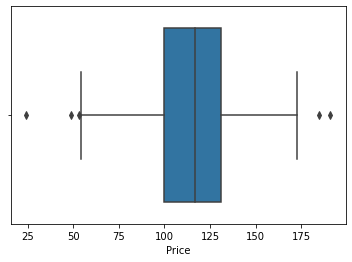

In [10]:
sns.boxplot(x='Price',data=company)

<AxesSubplot:xlabel='Age'>

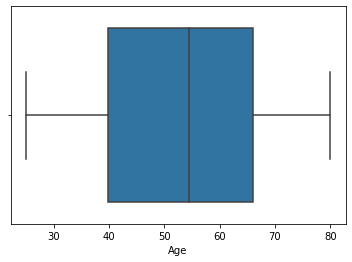

In [11]:
sns.boxplot(x='Age',data=company)

<AxesSubplot:xlabel='Education'>

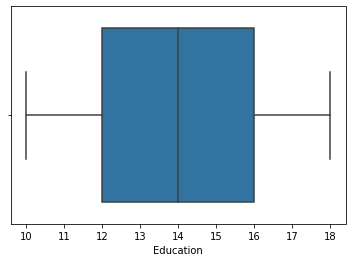

In [12]:
sns.boxplot(x='Education',data=company)

In [3]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


<Figure size 720x360 with 0 Axes>

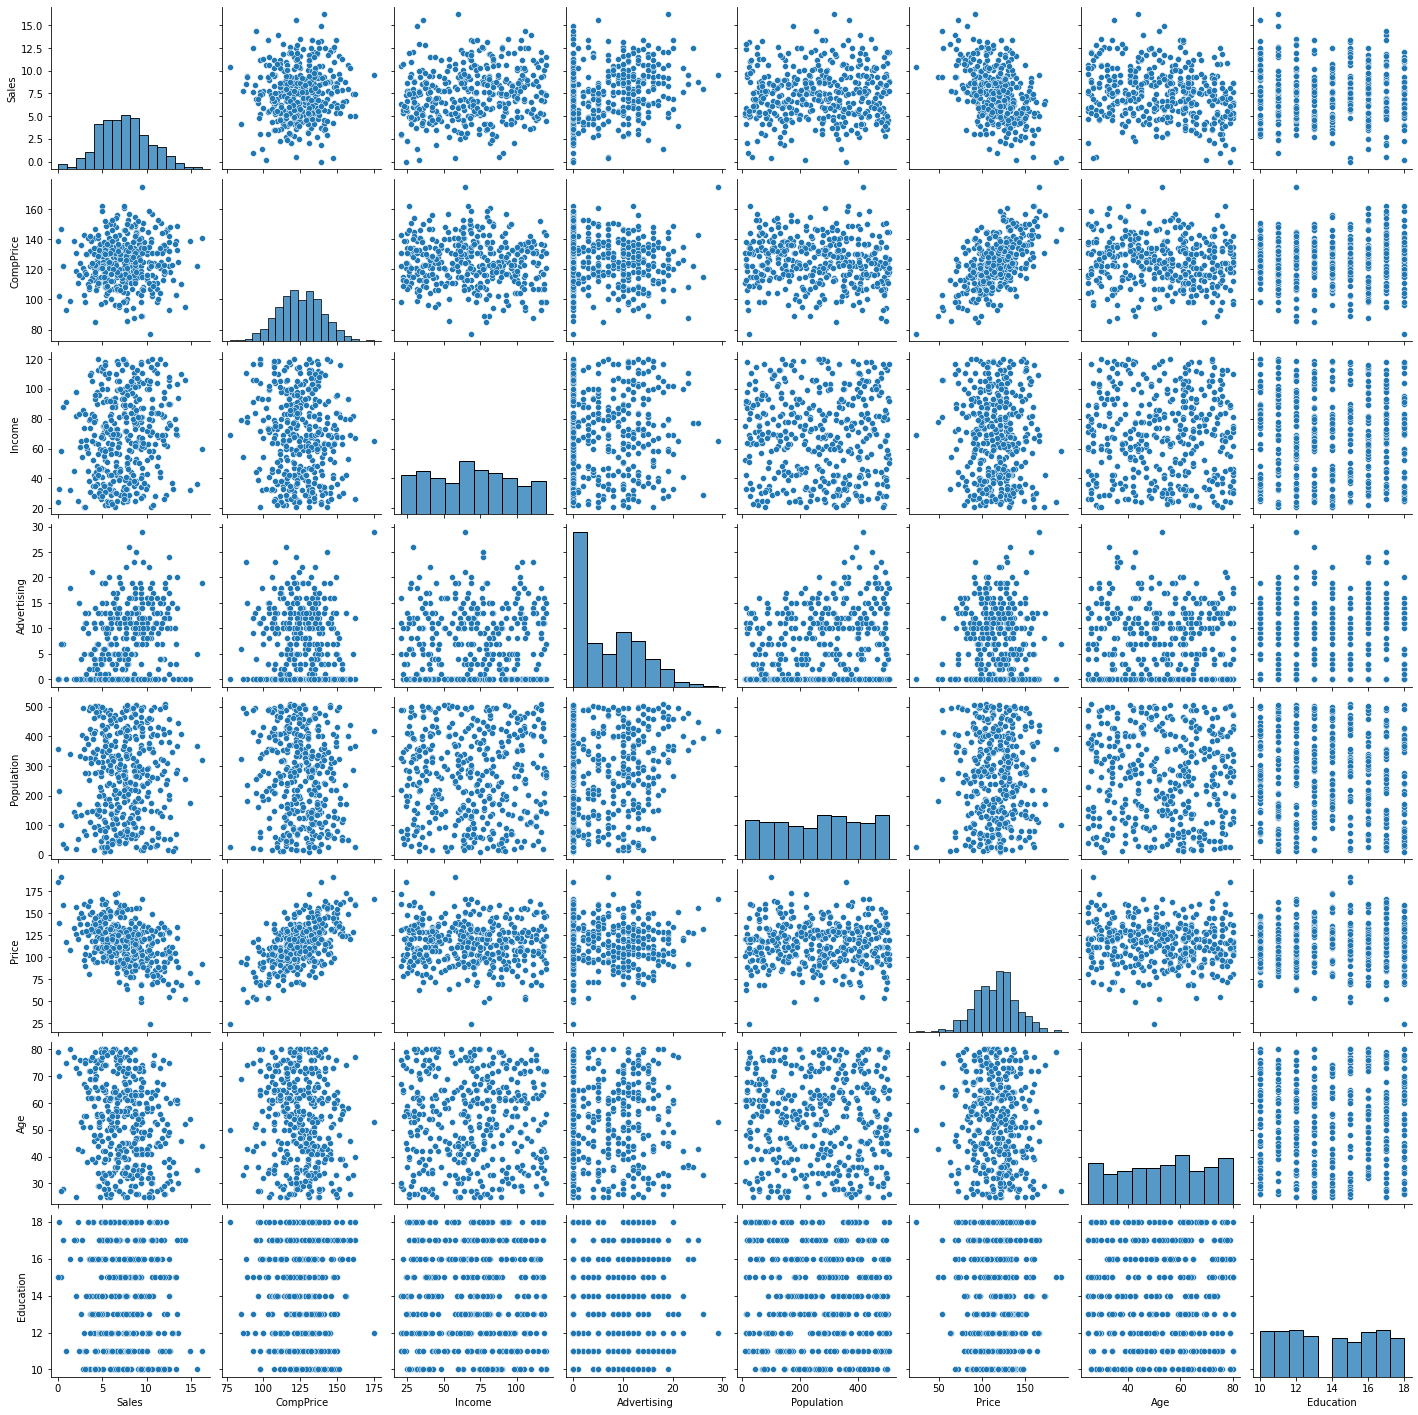

In [5]:
plt.figure(figsize=(10,5))
sns.pairplot(company)

In [6]:
# counting the categorical varibale
company['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

C:\Users\Osama Khan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ShelveLoc', ylabel='count'>

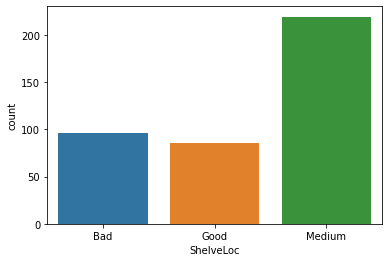

In [7]:
sns.countplot('ShelveLoc',data=company)

In [8]:
company['Urban'].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

C:\Users\Osama Khan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Urban', ylabel='count'>

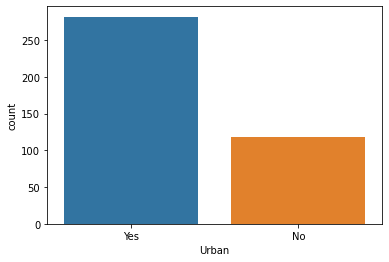

In [9]:
sns.countplot('Urban',data=company)

In [10]:
company['US'].value_counts()

Yes    258
No     142
Name: US, dtype: int64

C:\Users\Osama Khan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='US', ylabel='count'>

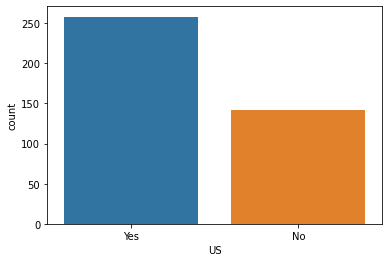

In [11]:
sns.countplot('US',data=company)

In [12]:
# converting  target varaibale into categorical("sales")
company['Sales']=pd.cut(company['Sales'],bins=[0,6,12,17],labels=['Low','Medium','High'],duplicates='drop')
company['Sales']

0      Medium
1      Medium
2      Medium
3      Medium
4         Low
        ...  
395      High
396    Medium
397    Medium
398       Low
399    Medium
Name: Sales, Length: 400, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

C:\Users\Osama Khan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales', ylabel='count'>

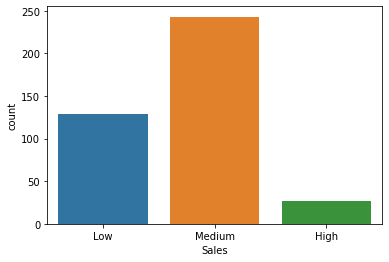

In [13]:
sns.countplot('Sales',data=company)

In [14]:
company['CompPrice']=pd.cut(company['CompPrice'],labels=['Low','Medium','High'],bins=[77,100,133,176],duplicates='drop')
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium,High,73,11,276,120,Bad,42,17,Yes,Yes
1,Medium,Medium,48,16,260,83,Good,65,10,Yes,Yes
2,Medium,Medium,35,10,269,80,Medium,59,12,Yes,Yes
3,Medium,Medium,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,High,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,High,High,108,17,203,128,Good,33,14,Yes,Yes
396,Medium,High,23,3,37,120,Medium,55,11,No,Yes
397,Medium,High,26,12,368,159,Medium,40,18,Yes,Yes
398,Low,Low,79,7,284,95,Bad,50,12,Yes,Yes


In [15]:
company['Income']=pd.cut(company['Income'],labels=['Low','Medium','High'],bins=[21,46,71,121],duplicates='drop')
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium,High,High,11,276,120,Bad,42,17,Yes,Yes
1,Medium,Medium,Medium,16,260,83,Good,65,10,Yes,Yes
2,Medium,Medium,Low,10,269,80,Medium,59,12,Yes,Yes
3,Medium,Medium,High,4,466,97,Medium,55,14,Yes,Yes
4,Low,High,Medium,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,High,High,High,17,203,128,Good,33,14,Yes,Yes
396,Medium,High,Low,3,37,120,Medium,55,11,No,Yes
397,Medium,High,Low,12,368,159,Medium,40,18,Yes,Yes
398,Low,Low,High,7,284,95,Bad,50,12,Yes,Yes


In [16]:
company['Advertising']=pd.cut(company['Advertising'],bins=[0,10,20,30],labels=['Low','Medium','High'],duplicates='drop')
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium,High,High,Medium,276,120,Bad,42,17,Yes,Yes
1,Medium,Medium,Medium,Medium,260,83,Good,65,10,Yes,Yes
2,Medium,Medium,Low,Low,269,80,Medium,59,12,Yes,Yes
3,Medium,Medium,High,Low,466,97,Medium,55,14,Yes,Yes
4,Low,High,Medium,Low,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,High,High,High,Medium,203,128,Good,33,14,Yes,Yes
396,Medium,High,Low,Low,37,120,Medium,55,11,No,Yes
397,Medium,High,Low,Medium,368,159,Medium,40,18,Yes,Yes
398,Low,Low,High,Low,284,95,Bad,50,12,Yes,Yes


In [17]:
company['Population']=pd.cut(company['Population'],bins=[10,170,340,510],labels=['Low','Medium','High'],duplicates='drop')
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium,High,High,Medium,Medium,120,Bad,42,17,Yes,Yes
1,Medium,Medium,Medium,Medium,Medium,83,Good,65,10,Yes,Yes
2,Medium,Medium,Low,Low,Medium,80,Medium,59,12,Yes,Yes
3,Medium,Medium,High,Low,High,97,Medium,55,14,Yes,Yes
4,Low,High,Medium,Low,Medium,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,High,High,High,Medium,Medium,128,Good,33,14,Yes,Yes
396,Medium,High,Low,Low,Low,120,Medium,55,11,No,Yes
397,Medium,High,Low,Medium,High,159,Medium,40,18,Yes,Yes
398,Low,Low,High,Low,Medium,95,Bad,50,12,Yes,Yes


In [18]:
company['Price']=pd.cut(company['Price'],bins=[24, 80, 136, 192],labels=['Low','Medium','High'],duplicates='drop')
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium,High,High,Medium,Medium,Medium,Bad,42,17,Yes,Yes
1,Medium,Medium,Medium,Medium,Medium,Medium,Good,65,10,Yes,Yes
2,Medium,Medium,Low,Low,Medium,Low,Medium,59,12,Yes,Yes
3,Medium,Medium,High,Low,High,Medium,Medium,55,14,Yes,Yes
4,Low,High,Medium,Low,Medium,Medium,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,High,High,High,Medium,Medium,Medium,Good,33,14,Yes,Yes
396,Medium,High,Low,Low,Low,Medium,Medium,55,11,No,Yes
397,Medium,High,Low,Medium,High,High,Medium,40,18,Yes,Yes
398,Low,Low,High,Low,Medium,Medium,Bad,50,12,Yes,Yes


In [19]:
company['Age']=pd.cut(company['Age'],bins=[25, 45, 60, 81],labels=['Low','Medium','High'],duplicates='drop')
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium,High,High,Medium,Medium,Medium,Bad,Low,17,Yes,Yes
1,Medium,Medium,Medium,Medium,Medium,Medium,Good,High,10,Yes,Yes
2,Medium,Medium,Low,Low,Medium,Low,Medium,Medium,12,Yes,Yes
3,Medium,Medium,High,Low,High,Medium,Medium,Medium,14,Yes,Yes
4,Low,High,Medium,Low,Medium,Medium,Bad,Low,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,High,High,High,Medium,Medium,Medium,Good,Low,14,Yes,Yes
396,Medium,High,Low,Low,Low,Medium,Medium,Medium,11,No,Yes
397,Medium,High,Low,Medium,High,High,Medium,Low,18,Yes,Yes
398,Low,Low,High,Low,Medium,Medium,Bad,Medium,12,Yes,Yes


In [20]:
company['Education']=pd.cut(company['Education'],bins=[0,12.5,15,19],labels=['Low','Medium','High'],duplicates='drop')
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium,High,High,Medium,Medium,Medium,Bad,Low,High,Yes,Yes
1,Medium,Medium,Medium,Medium,Medium,Medium,Good,High,Low,Yes,Yes
2,Medium,Medium,Low,Low,Medium,Low,Medium,Medium,Low,Yes,Yes
3,Medium,Medium,High,Low,High,Medium,Medium,Medium,Medium,Yes,Yes
4,Low,High,Medium,Low,Medium,Medium,Bad,Low,Medium,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,High,High,High,Medium,Medium,Medium,Good,Low,Medium,Yes,Yes
396,Medium,High,Low,Low,Low,Medium,Medium,Medium,Low,No,Yes
397,Medium,High,Low,Medium,High,High,Medium,Low,High,Yes,Yes
398,Low,Low,High,Low,Medium,Medium,Bad,Medium,Low,Yes,Yes


In [21]:
# encoding datasets
label_encoder=preprocessing.LabelEncoder()
company['Sales']=label_encoder.fit_transform(company['Sales'])
company['CompPrice']=label_encoder.fit_transform(company['CompPrice'])
company['Income']=label_encoder.fit_transform(company['Income'])
company['Advertising']=label_encoder.fit_transform(company['Advertising'])
company['Population']=label_encoder.fit_transform(company['Population'])
company['Price']=label_encoder.fit_transform(company['Price'])
company['ShelveLoc']=label_encoder.fit_transform(company['ShelveLoc'])
company['Age']=label_encoder.fit_transform(company['Age'])
company['Education']=label_encoder.fit_transform(company['Education'])
company['Urban']=label_encoder.fit_transform(company['Urban'])
company['US']=label_encoder.fit_transform(company['US'])

In [22]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,0,0,2,2,2,0,1,0,1,1
1,2,2,2,2,2,2,1,0,1,1,1
2,2,2,1,1,2,1,2,2,1,1,1
3,2,2,0,1,0,2,2,2,2,1,1
4,1,0,2,1,2,2,0,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,0,0,2,2,2,1,1,2,1,1
396,2,0,1,1,1,2,2,2,1,0,1
397,2,0,1,2,0,0,2,1,0,1,1
398,1,1,0,1,2,2,0,2,1,1,1


In [23]:
# spliting into x and y
x=company.iloc[:,1:]
y=company['Sales']

In [24]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,0,2,2,2,0,1,0,1,1
1,2,2,2,2,2,1,0,1,1,1
2,2,1,1,2,1,2,2,1,1,1
3,2,0,1,0,2,2,2,2,1,1
4,0,2,1,2,2,0,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...
395,0,0,2,2,2,1,1,2,1,1
396,0,1,1,1,2,2,2,1,0,1
397,0,1,2,0,0,2,1,0,1,1
398,1,0,1,2,2,0,2,1,1,1


In [25]:
y

0      2
1      2
2      2
3      2
4      1
      ..
395    0
396    2
397    2
398    1
399    2
Name: Sales, Length: 400, dtype: int32

In [26]:
company['Sales'].unique()

array([2, 1, 0, 3])

In [27]:
company.Sales.value_counts()

2    243
1    129
0     27
3      1
Name: Sales, dtype: int64

C:\Users\Osama Khan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales', ylabel='count'>

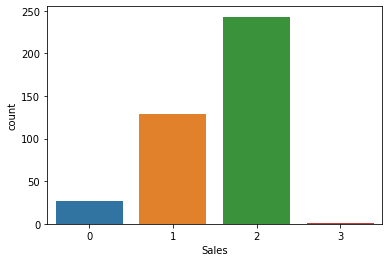

In [28]:
sns.countplot('Sales',data=company)

In [29]:
# Splitting data into training and testing data set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [30]:
x_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
85,2,0,3,2,2,2,2,2,0,0
69,2,2,3,2,2,2,0,1,1,0
203,2,0,3,1,0,0,3,2,1,0
379,2,0,3,0,2,0,2,2,1,0
261,2,1,1,2,2,2,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...
306,2,1,1,1,2,2,2,1,1,1
165,0,2,1,1,0,0,1,2,1,1
7,0,0,2,0,2,1,0,1,1,1
219,2,0,2,0,2,1,2,0,1,1


In [31]:
x_test

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
132,2,0,1,2,2,1,0,1,1,1
390,2,0,1,1,2,2,0,1,1,1
310,0,2,0,0,0,2,2,1,1,1
3,2,0,1,0,2,2,2,2,1,1
248,2,2,3,1,2,2,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,2,2,2,2,2,0,1
197,2,2,3,2,0,2,0,0,1,0
23,2,1,3,2,2,2,0,1,1,0
54,0,0,2,1,0,2,0,0,0,1


In [32]:
y_train

85     2
69     2
203    1
379    1
261    1
      ..
306    1
165    1
7      2
219    2
326    1
Name: Sales, Length: 320, dtype: int32

In [33]:
y_test

132    2
390    1
310    2
3      2
248    1
      ..
361    2
197    1
23     1
54     1
58     1
Name: Sales, Length: 80, dtype: int32

## Building Decision Tree Classifier(CART) using Gini Criteria

In [47]:
model=DecisionTreeClassifier(criterion='gini',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

[Text(141.64615384615385, 190.26, 'X[5] <= 0.5\ngini = 0.529\nsamples = 320\nvalue = [24, 102, 193, 1]'),
 Text(51.50769230769231, 135.9, 'X[4] <= 0.5\ngini = 0.468\nsamples = 83\nvalue = [0, 52, 31, 0]'),
 Text(25.753846153846155, 81.53999999999999, 'gini = 0.0\nsamples = 14\nvalue = [0, 14, 0, 0]'),
 Text(77.26153846153846, 81.53999999999999, 'X[4] <= 1.5\ngini = 0.495\nsamples = 69\nvalue = [0, 38, 31, 0]'),
 Text(51.50769230769231, 27.180000000000007, 'gini = 0.0\nsamples = 7\nvalue = [0, 0, 7, 0]'),
 Text(103.01538461538462, 27.180000000000007, 'gini = 0.475\nsamples = 62\nvalue = [0, 38, 24, 0]'),
 Text(231.7846153846154, 135.9, 'X[5] <= 1.5\ngini = 0.478\nsamples = 237\nvalue = [24, 50, 162, 1]'),
 Text(180.27692307692308, 81.53999999999999, 'X[4] <= 0.5\ngini = 0.393\nsamples = 67\nvalue = [18, 0, 49, 0]'),
 Text(154.52307692307693, 27.180000000000007, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 12, 0]'),
 Text(206.03076923076924, 27.180000000000007, 'gini = 0.44\nsamples = 55\nv

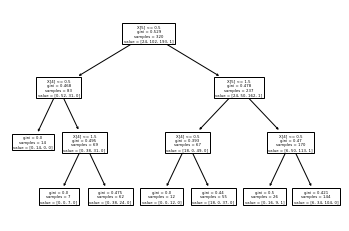

In [48]:
#PLot the decision tree
tree.plot_tree(model)

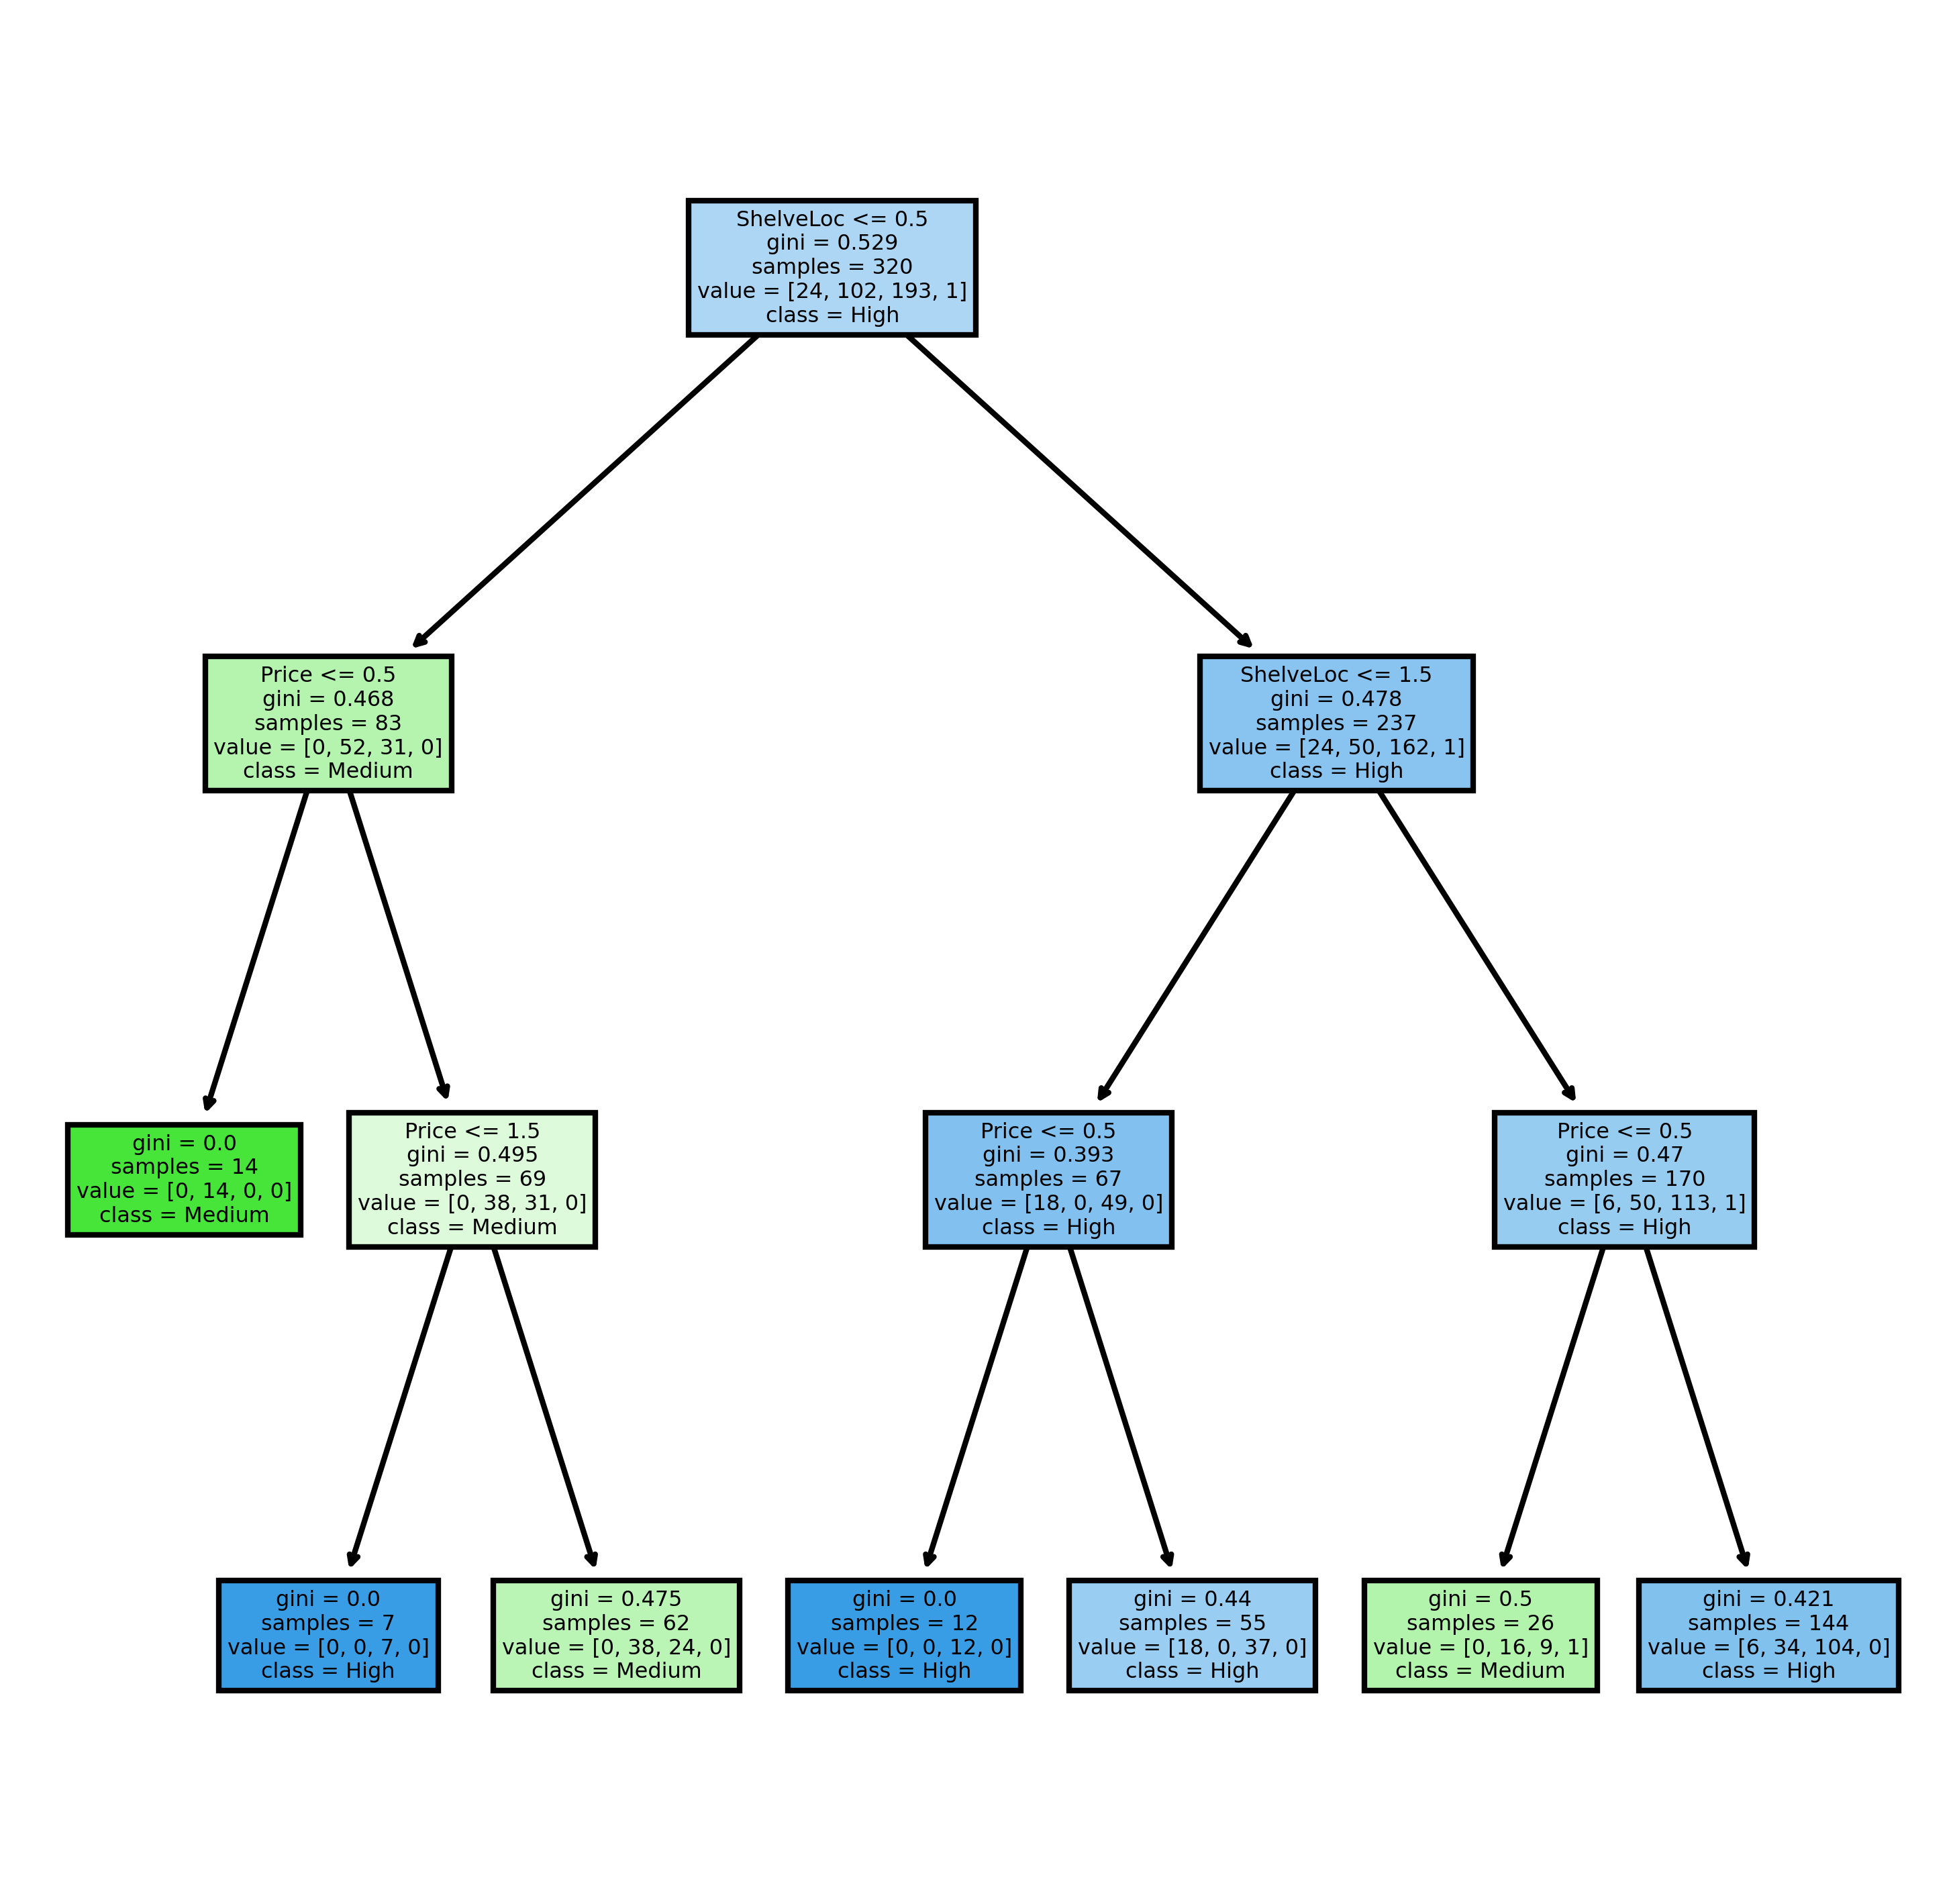

In [49]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Low','Medium','High']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(6,6),dpi=600)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True);

In [62]:
#Predicting on test data
preds=model.predict(x_test)
pd.Series(preds).value_counts()

2    57
1    23
dtype: int64

In [63]:
preds

array([2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2,
       2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1])

In [64]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,1,2
Sales,,
0,0,3
1,15,12
2,8,42


In [65]:
np.mean(preds==y_test)

0.7125

##  Building model based on C5.0 Algorithm

In [52]:
model_c5=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model_c5.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(141.64615384615385, 190.26, 'X[5] <= 0.5\nentropy = 1.272\nsamples = 320\nvalue = [24, 102, 193, 1]'),
 Text(51.50769230769231, 135.9, 'X[4] <= 0.5\nentropy = 0.953\nsamples = 83\nvalue = [0, 52, 31, 0]'),
 Text(25.753846153846155, 81.53999999999999, 'entropy = 0.0\nsamples = 14\nvalue = [0, 14, 0, 0]'),
 Text(77.26153846153846, 81.53999999999999, 'X[4] <= 1.5\nentropy = 0.993\nsamples = 69\nvalue = [0, 38, 31, 0]'),
 Text(51.50769230769231, 27.180000000000007, 'entropy = 0.0\nsamples = 7\nvalue = [0, 0, 7, 0]'),
 Text(103.01538461538462, 27.180000000000007, 'entropy = 0.963\nsamples = 62\nvalue = [0, 38, 24, 0]'),
 Text(231.7846153846154, 135.9, 'X[5] <= 1.5\nentropy = 1.217\nsamples = 237\nvalue = [24, 50, 162, 1]'),
 Text(180.27692307692308, 81.53999999999999, 'X[4] <= 0.5\nentropy = 0.84\nsamples = 67\nvalue = [18, 0, 49, 0]'),
 Text(154.52307692307693, 27.180000000000007, 'entropy = 0.0\nsamples = 12\nvalue = [0, 0, 12, 0]'),
 Text(206.03076923076924, 27.180000000000007, 'en

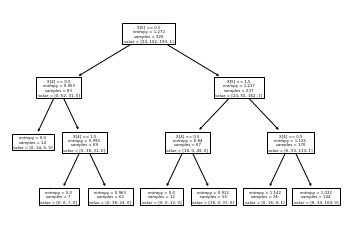

In [53]:
tree.plot_tree(model_c5)

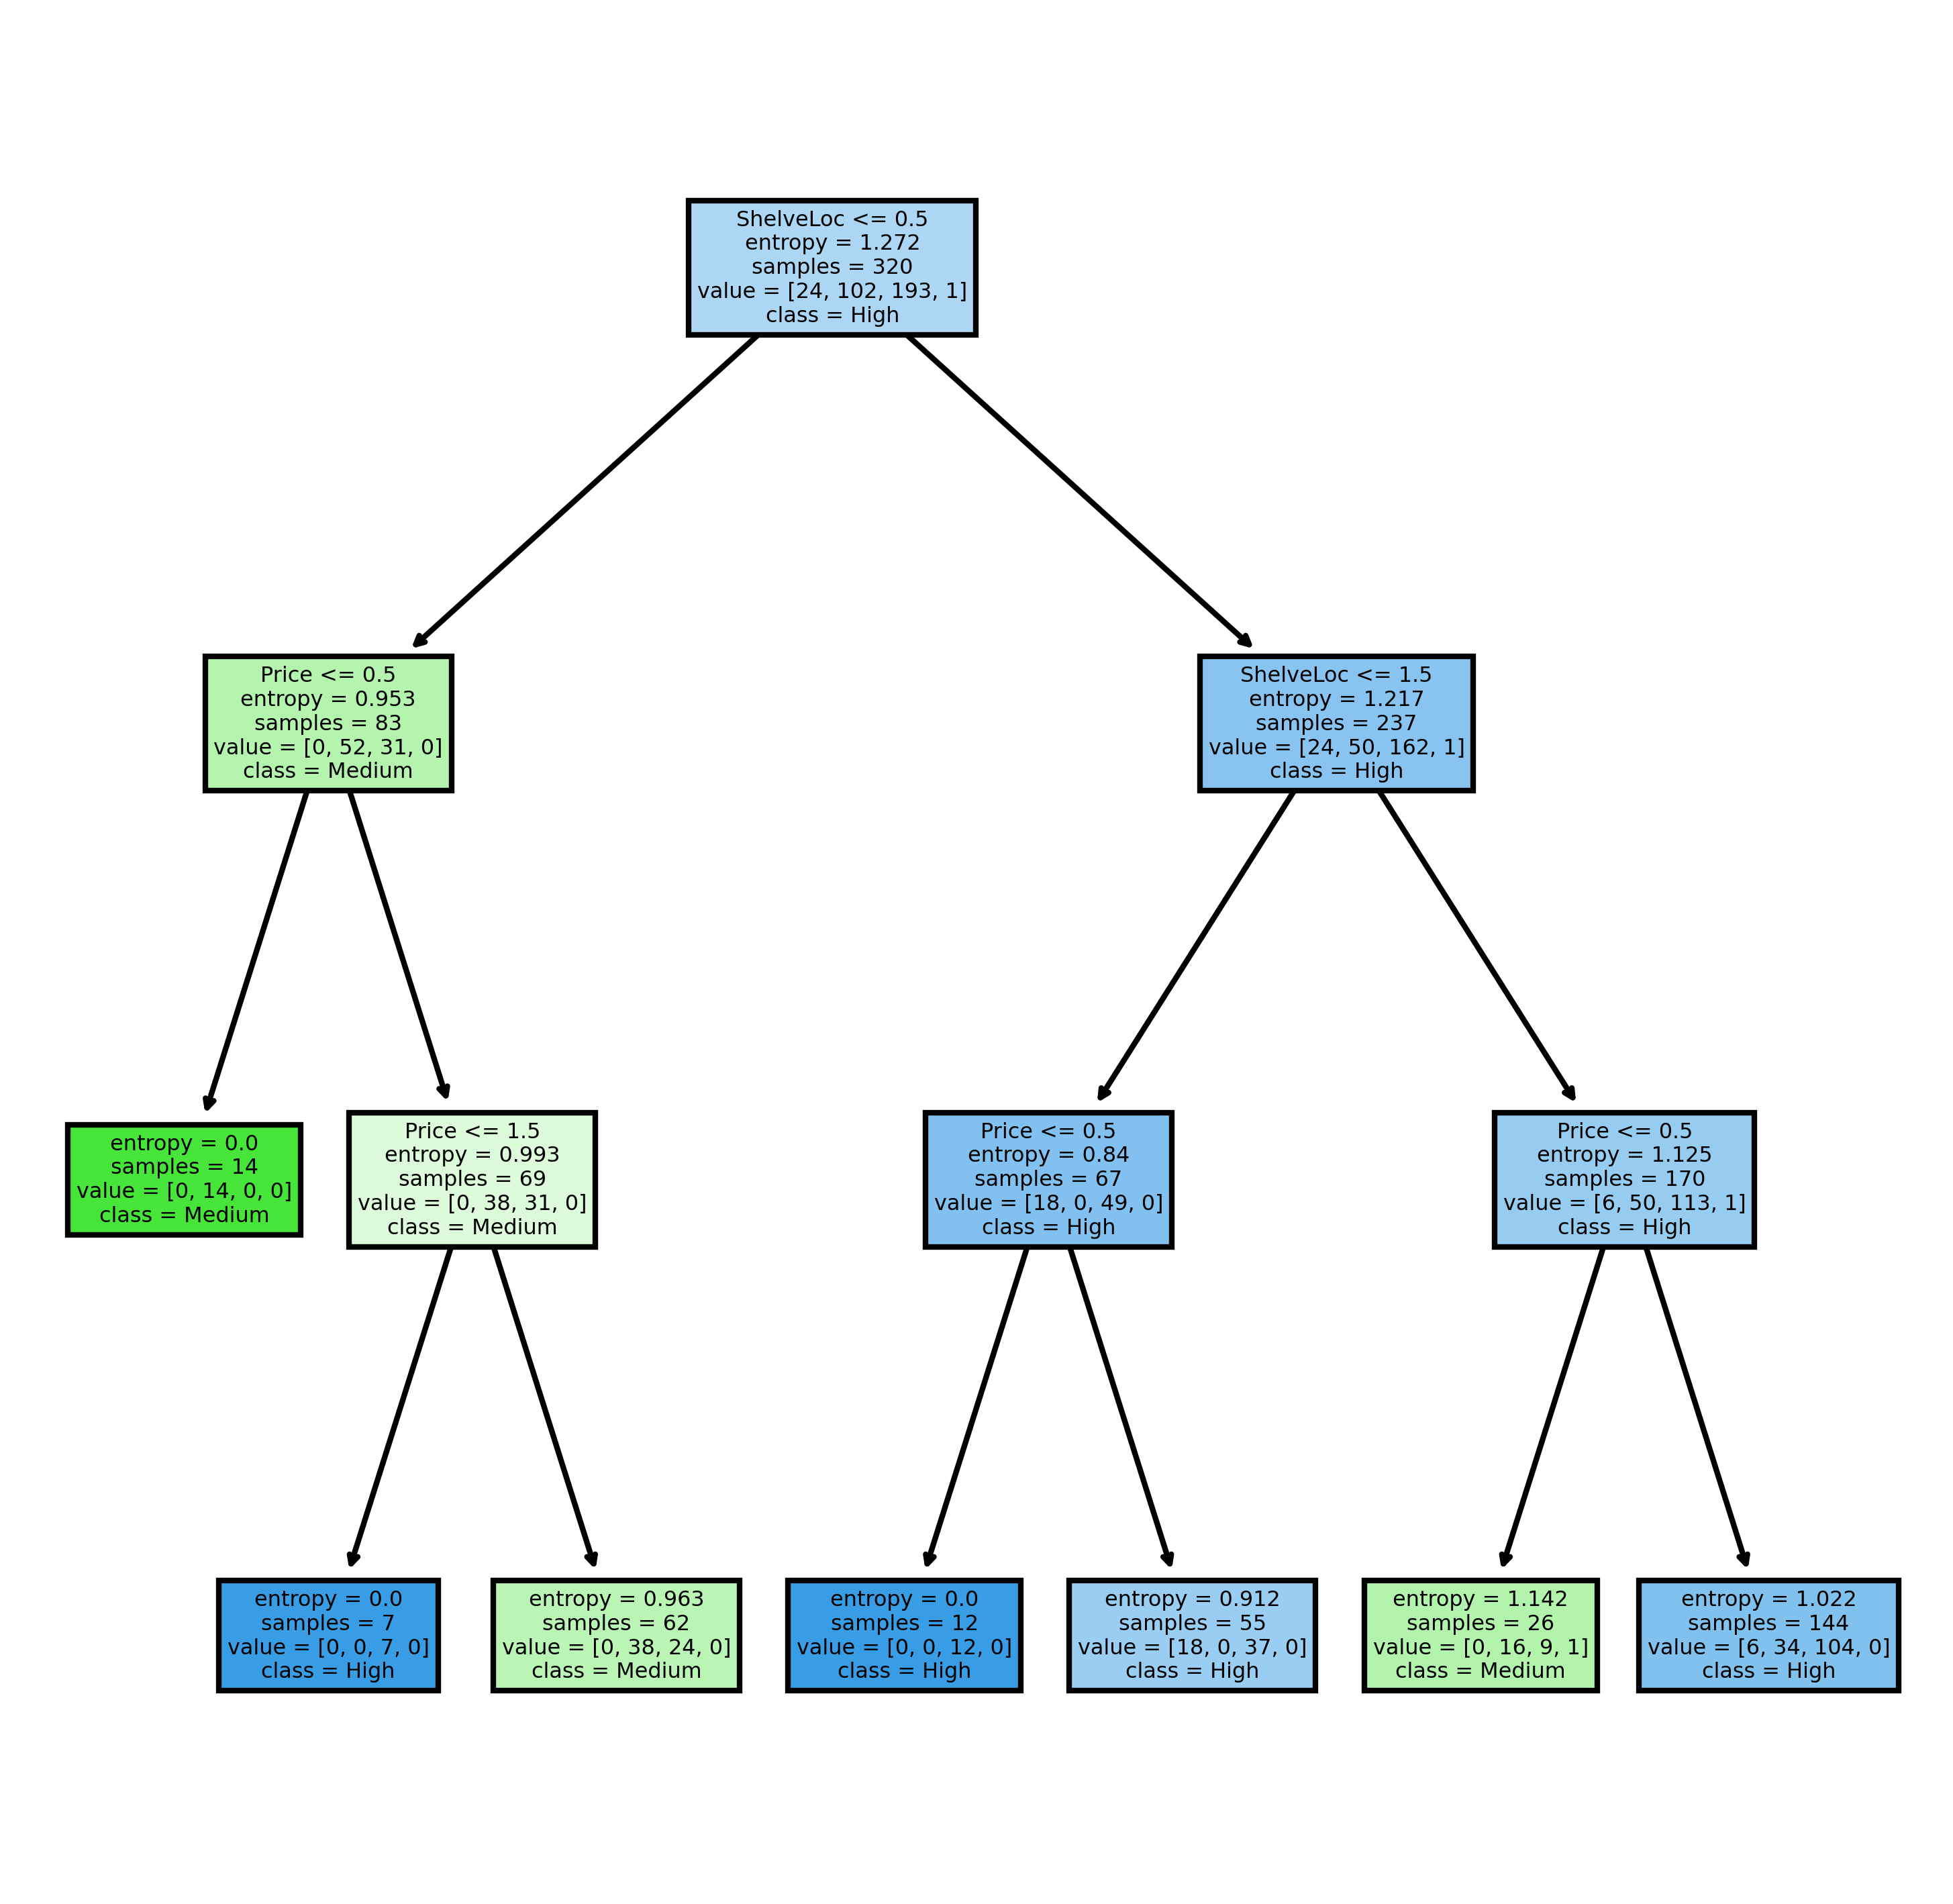

In [56]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Low', 'Medium', 'High']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(6,6),dpi=600)
tree.plot_tree(model_c5,
               feature_names=fn,
               class_names=cn,
               filled=True);

In [57]:
 # Predicting Data
preds=model_c5.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

2    57
1    23
dtype: int64

In [58]:
preds

array([2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2,
       2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1])

In [59]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,1,2
Sales,,
0,0,3
1,15,12
2,8,42


In [66]:
# Checking accuracy of model
np.mean(preds==y_test)

0.7125

# Use decision trees to prepare a model on fraud data  treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
from sklearn.metrics import classification_report

In [14]:
fraud=pd.read_csv('C:/Users/Osama Khan/OneDrive/Documents/Data Science/Assignment/Assignment 14/Fraud_check.csv')
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [15]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [16]:
fraud=fraud.rename({'Marital.Status':'Marital_status','Taxable.Income':'Taxable_income','City.Population':'City_population',
                    'Work.Experience':'Work_experience'},axis=1)
fraud

,Undergrad,Marital_status,Taxable_income,City_population,Work_experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


<AxesSubplot:xlabel='Taxable_income'>

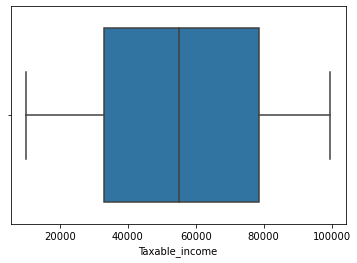

In [17]:
# Checking Outlier in numerical dataset.
sns.boxplot(x='Taxable_income',data=fraud)

<AxesSubplot:xlabel='City_population'>

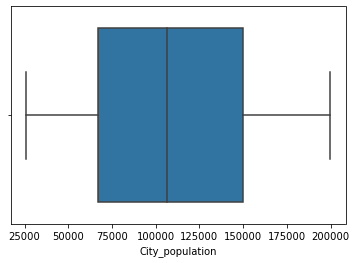

In [18]:
sns.boxplot(x='City_population',data=fraud)

<AxesSubplot:xlabel='Work_experience'>

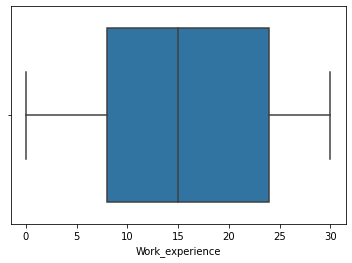

In [19]:
sns.boxplot(x='Work_experience',data=fraud)

In [72]:
fraud.describe()

,Taxable_income,City_population,Work_experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


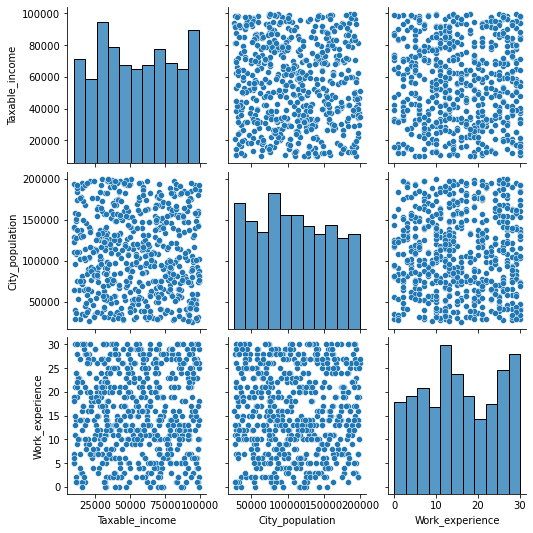

In [73]:
sns.pairplot(fraud)

In [74]:
# counting the categorical varibale
fraud['Undergrad'].value_counts()

YES    312
NO     288
Name: Undergrad, dtype: int64

C:\Users\Osama Khan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Undergrad', ylabel='count'>

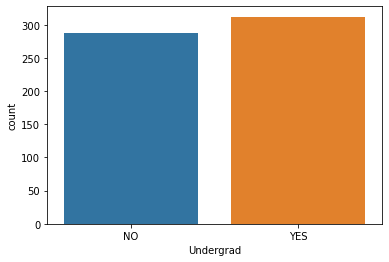

In [75]:
sns.countplot('Undergrad',data=fraud)

In [76]:
fraud['Marital_status'].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital_status, dtype: int64

C:\Users\Osama Khan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marital_status', ylabel='count'>

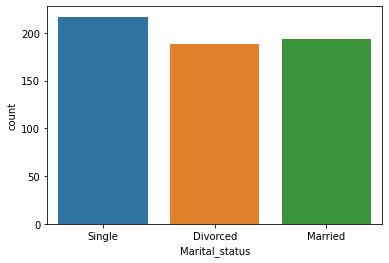

In [77]:
sns.countplot('Marital_status',data=fraud)

In [78]:
fraud['Urban'].value_counts()

YES    302
NO     298
Name: Urban, dtype: int64

C:\Users\Osama Khan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Urban', ylabel='count'>

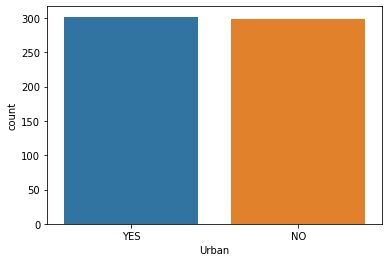

In [79]:
sns.countplot('Urban',data=fraud)

In [89]:
# Converting taxable_income <= 30000 as "Risky" and others are "Good"
fraud['Taxable_income']=pd.cut(fraud['Taxable_income'],bins=[10002,30000,99620],labels=['Risky','Good'])
fraud

,Undergrad,Marital_status,Taxable_income,City_population,Work_experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,Good,39492,7,YES
596,YES,Divorced,Good,55369,2,YES
597,NO,Divorced,Good,154058,0,YES
598,YES,Married,Good,180083,17,NO


C:\Users\Osama Khan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Taxable_income', ylabel='count'>

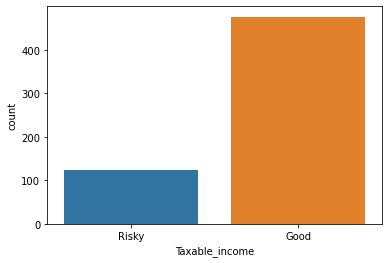

In [90]:
sns.countplot('Taxable_income',data=fraud)

In [91]:
fraud['Taxable_income'].value_counts()

Good     476
Risky    124
Name: Taxable_income, dtype: int64

In [93]:
#encoding categorical dataset
label_encoder=preprocessing.LabelEncoder()


In [95]:
fraud['Undergrad']=label_encoder.fit_transform(fraud['Undergrad'])
fraud

,Undergrad,Marital_status,Taxable_income,City_population,Work_experience,Urban
0,0,Single,Good,50047,10,YES
1,1,Divorced,Good,134075,18,YES
2,0,Married,Good,160205,30,YES
3,1,Single,Good,193264,15,YES
4,0,Married,Good,27533,28,NO
...,...,...,...,...,...,...
595,1,Divorced,Good,39492,7,YES
596,1,Divorced,Good,55369,2,YES
597,0,Divorced,Good,154058,0,YES
598,1,Married,Good,180083,17,NO


In [96]:
fraud['Marital_status']=label_encoder.fit_transform(fraud['Marital_status'])
fraud

,Undergrad,Marital_status,Taxable_income,City_population,Work_experience,Urban
0,0,2,Good,50047,10,YES
1,1,0,Good,134075,18,YES
2,0,1,Good,160205,30,YES
3,1,2,Good,193264,15,YES
4,0,1,Good,27533,28,NO
...,...,...,...,...,...,...
595,1,0,Good,39492,7,YES
596,1,0,Good,55369,2,YES
597,0,0,Good,154058,0,YES
598,1,1,Good,180083,17,NO


In [97]:
fraud['Taxable_income']=label_encoder.fit_transform(fraud['Taxable_income'])
fraud

,Undergrad,Marital_status,Taxable_income,City_population,Work_experience,Urban
0,0,2,0,50047,10,YES
1,1,0,0,134075,18,YES
2,0,1,0,160205,30,YES
3,1,2,0,193264,15,YES
4,0,1,0,27533,28,NO
...,...,...,...,...,...,...
595,1,0,0,39492,7,YES
596,1,0,0,55369,2,YES
597,0,0,0,154058,0,YES
598,1,1,0,180083,17,NO


In [98]:
fraud['Urban']=label_encoder.fit_transform(fraud['Urban'])
fraud

,Undergrad,Marital_status,Taxable_income,City_population,Work_experience,Urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0
...,...,...,...,...,...,...
595,1,0,0,39492,7,1
596,1,0,0,55369,2,1
597,0,0,0,154058,0,1
598,1,1,0,180083,17,0


In [99]:
x=fraud.drop('Taxable_income',axis=1)
y=fraud['Taxable_income']

In [100]:
x

,Undergrad,Marital_status,City_population,Work_experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [101]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Taxable_income, Length: 600, dtype: int32

In [102]:
# Splitting data into training and testing data set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=45)

In [103]:
x_train

,Undergrad,Marital_status,City_population,Work_experience,Urban
416,0,2,33982,30,0
142,0,2,122654,26,1
480,0,0,72252,26,1
67,1,1,173986,24,0
481,1,2,120012,13,0
...,...,...,...,...,...
377,1,2,103490,30,0
580,1,0,123335,1,1
163,1,0,91851,15,1
544,0,2,133877,21,1


In [104]:
x_test

,Undergrad,Marital_status,City_population,Work_experience,Urban
491,0,0,82029,10,0
4,0,1,27533,28,0
64,1,2,118261,15,0
407,0,2,52144,6,0
61,1,1,86169,8,0
...,...,...,...,...,...
565,0,0,31064,28,0
556,0,2,34242,12,0
550,0,1,68160,2,1
159,1,2,28504,1,0


In [105]:
y_train

416    0
142    0
480    0
67     0
481    0
      ..
377    0
580    0
163    1
544    1
414    0
Name: Taxable_income, Length: 420, dtype: int32

In [106]:
y_test

491    1
4      0
64     0
407    0
61     1
      ..
565    0
556    0
550    0
159    0
262    0
Name: Taxable_income, Length: 180, dtype: int32

##  Building model based on CART Algorithm

In [109]:
model=DecisionTreeClassifier(criterion='gini',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

[Text(125.55000000000001, 190.26, 'X[2] <= 27057.0\ngini = 0.342\nsamples = 420\nvalue = [328, 92]'),
 Text(83.7, 135.9, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(167.4, 135.9, 'X[2] <= 58380.0\ngini = 0.34\nsamples = 419\nvalue = [328, 91]'),
 Text(83.7, 81.53999999999999, 'X[2] <= 37812.5\ngini = 0.249\nsamples = 89\nvalue = [76, 13]'),
 Text(41.85, 27.180000000000007, 'gini = 0.412\nsamples = 31\nvalue = [22, 9]'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.128\nsamples = 58\nvalue = [54, 4]'),
 Text(251.10000000000002, 81.53999999999999, 'X[1] <= 0.5\ngini = 0.361\nsamples = 330\nvalue = [252, 78]'),
 Text(209.25, 27.180000000000007, 'gini = 0.269\nsamples = 106\nvalue = [89, 17]'),
 Text(292.95, 27.180000000000007, 'gini = 0.396\nsamples = 224\nvalue = [163, 61]')]

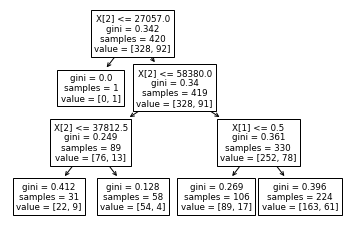

In [110]:
#PLot the decision tree
tree.plot_tree(model)

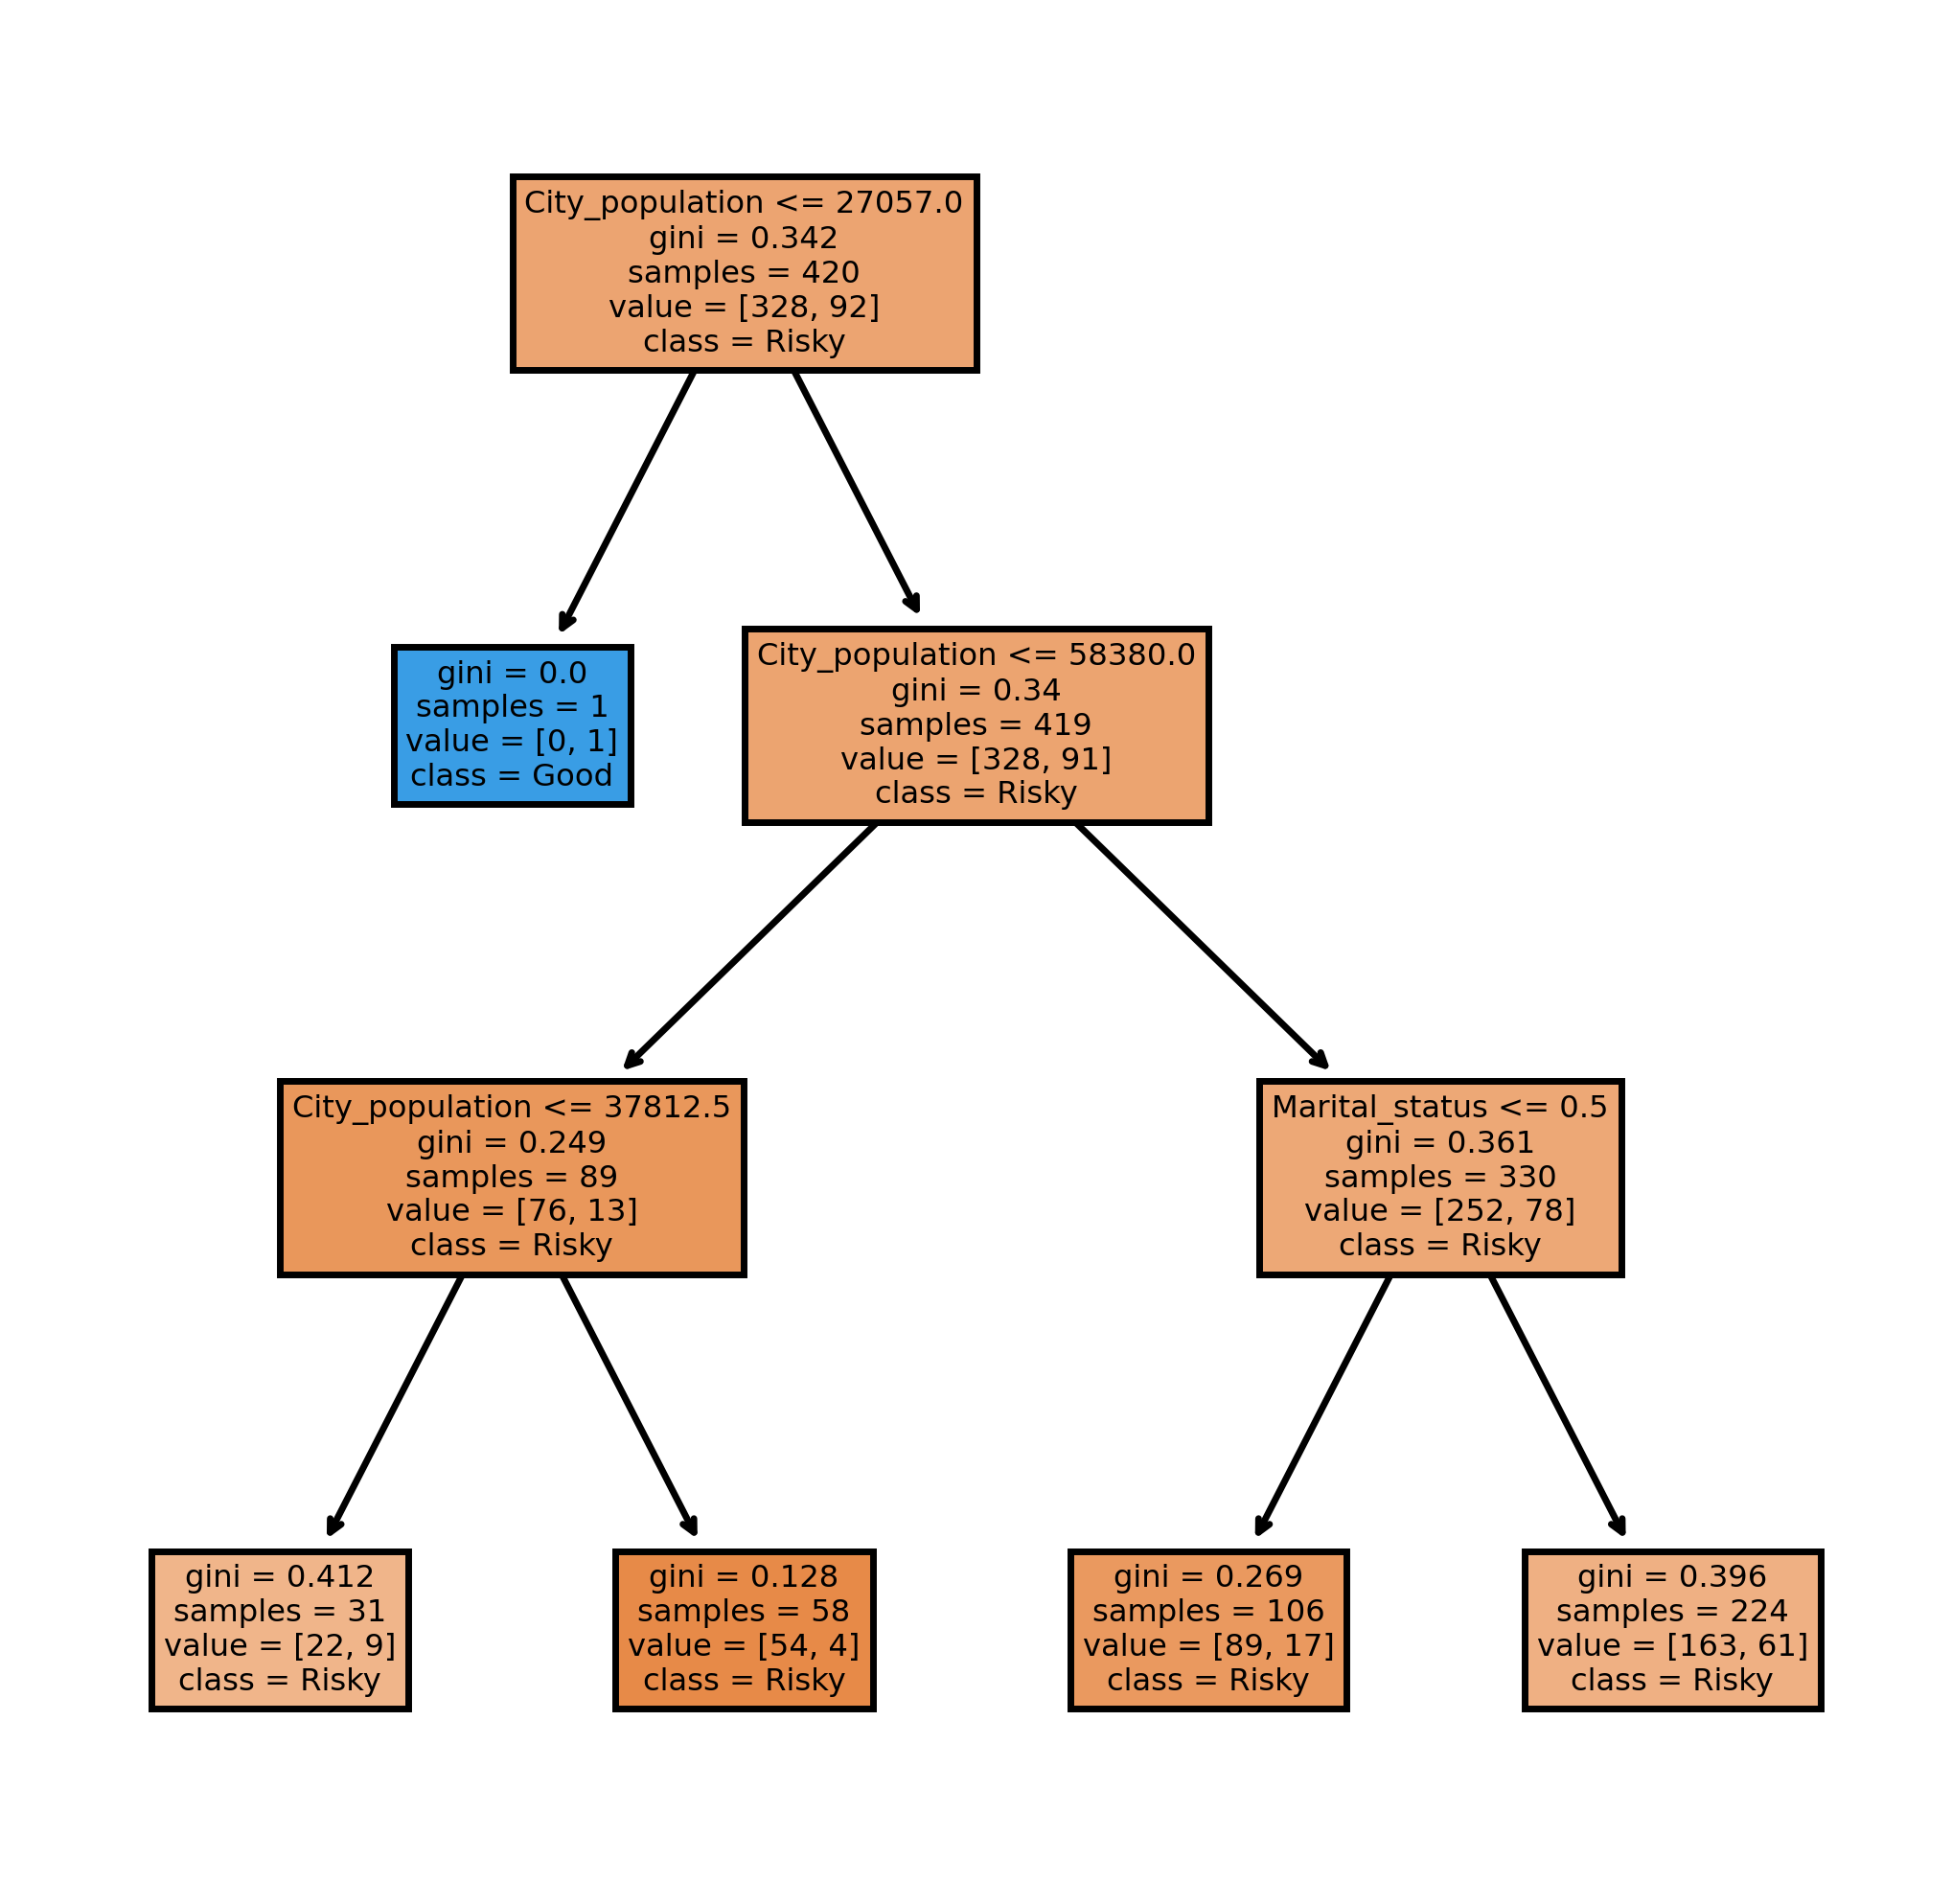

In [111]:
fn=['Undergrad','Marital_status','City_population','Work_experience','Taxable_income','Urban']
cn=['Risky','Good']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(5,5),dpi=500)
tree.plot_tree(model,
              feature_names=fn,class_names=cn,
               filled=True);

In [113]:
# Predicting Data
preds=model.predict(x_test)
pd.Series(preds).value_counts()

0    178
1      2
dtype: int64

In [114]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [115]:
pd.crosstab(y_test,preds)

col_0,0,1
Taxable_income,,
0,146,2
1,32,0


In [116]:
np.mean(preds==y_test)

0.8111111111111111

## Building model based on C5.0 Algorithm

In [117]:
model_c5=DecisionTreeClassifier(criterion='entropy',max_depth=4)
model_c5.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

[Text(146.475, 195.696, 'X[2] <= 27057.0\nentropy = 0.758\nsamples = 420\nvalue = [328, 92]'),
 Text(125.55000000000001, 152.208, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(167.4, 152.208, 'X[2] <= 58380.0\nentropy = 0.755\nsamples = 419\nvalue = [328, 91]'),
 Text(83.7, 108.72, 'X[2] <= 39426.0\nentropy = 0.6\nsamples = 89\nvalue = [76, 13]'),
 Text(41.85, 65.232, 'X[2] <= 32134.5\nentropy = 0.842\nsamples = 37\nvalue = [27, 10]'),
 Text(20.925, 21.744, 'entropy = 0.592\nsamples = 21\nvalue = [18, 3]'),
 Text(62.775000000000006, 21.744, 'entropy = 0.989\nsamples = 16\nvalue = [9, 7]'),
 Text(125.55000000000001, 65.232, 'X[3] <= 14.0\nentropy = 0.318\nsamples = 52\nvalue = [49, 3]'),
 Text(104.625, 21.744, 'entropy = 0.516\nsamples = 26\nvalue = [23, 3]'),
 Text(146.475, 21.744, 'entropy = 0.0\nsamples = 26\nvalue = [26, 0]'),
 Text(251.10000000000002, 108.72, 'X[1] <= 0.5\nentropy = 0.789\nsamples = 330\nvalue = [252, 78]'),
 Text(209.25, 65.232, 'X[2] <= 163299.5\nentropy =

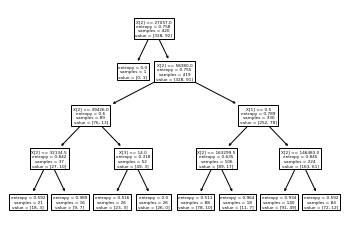

In [118]:
tree.plot_tree(model_c5)

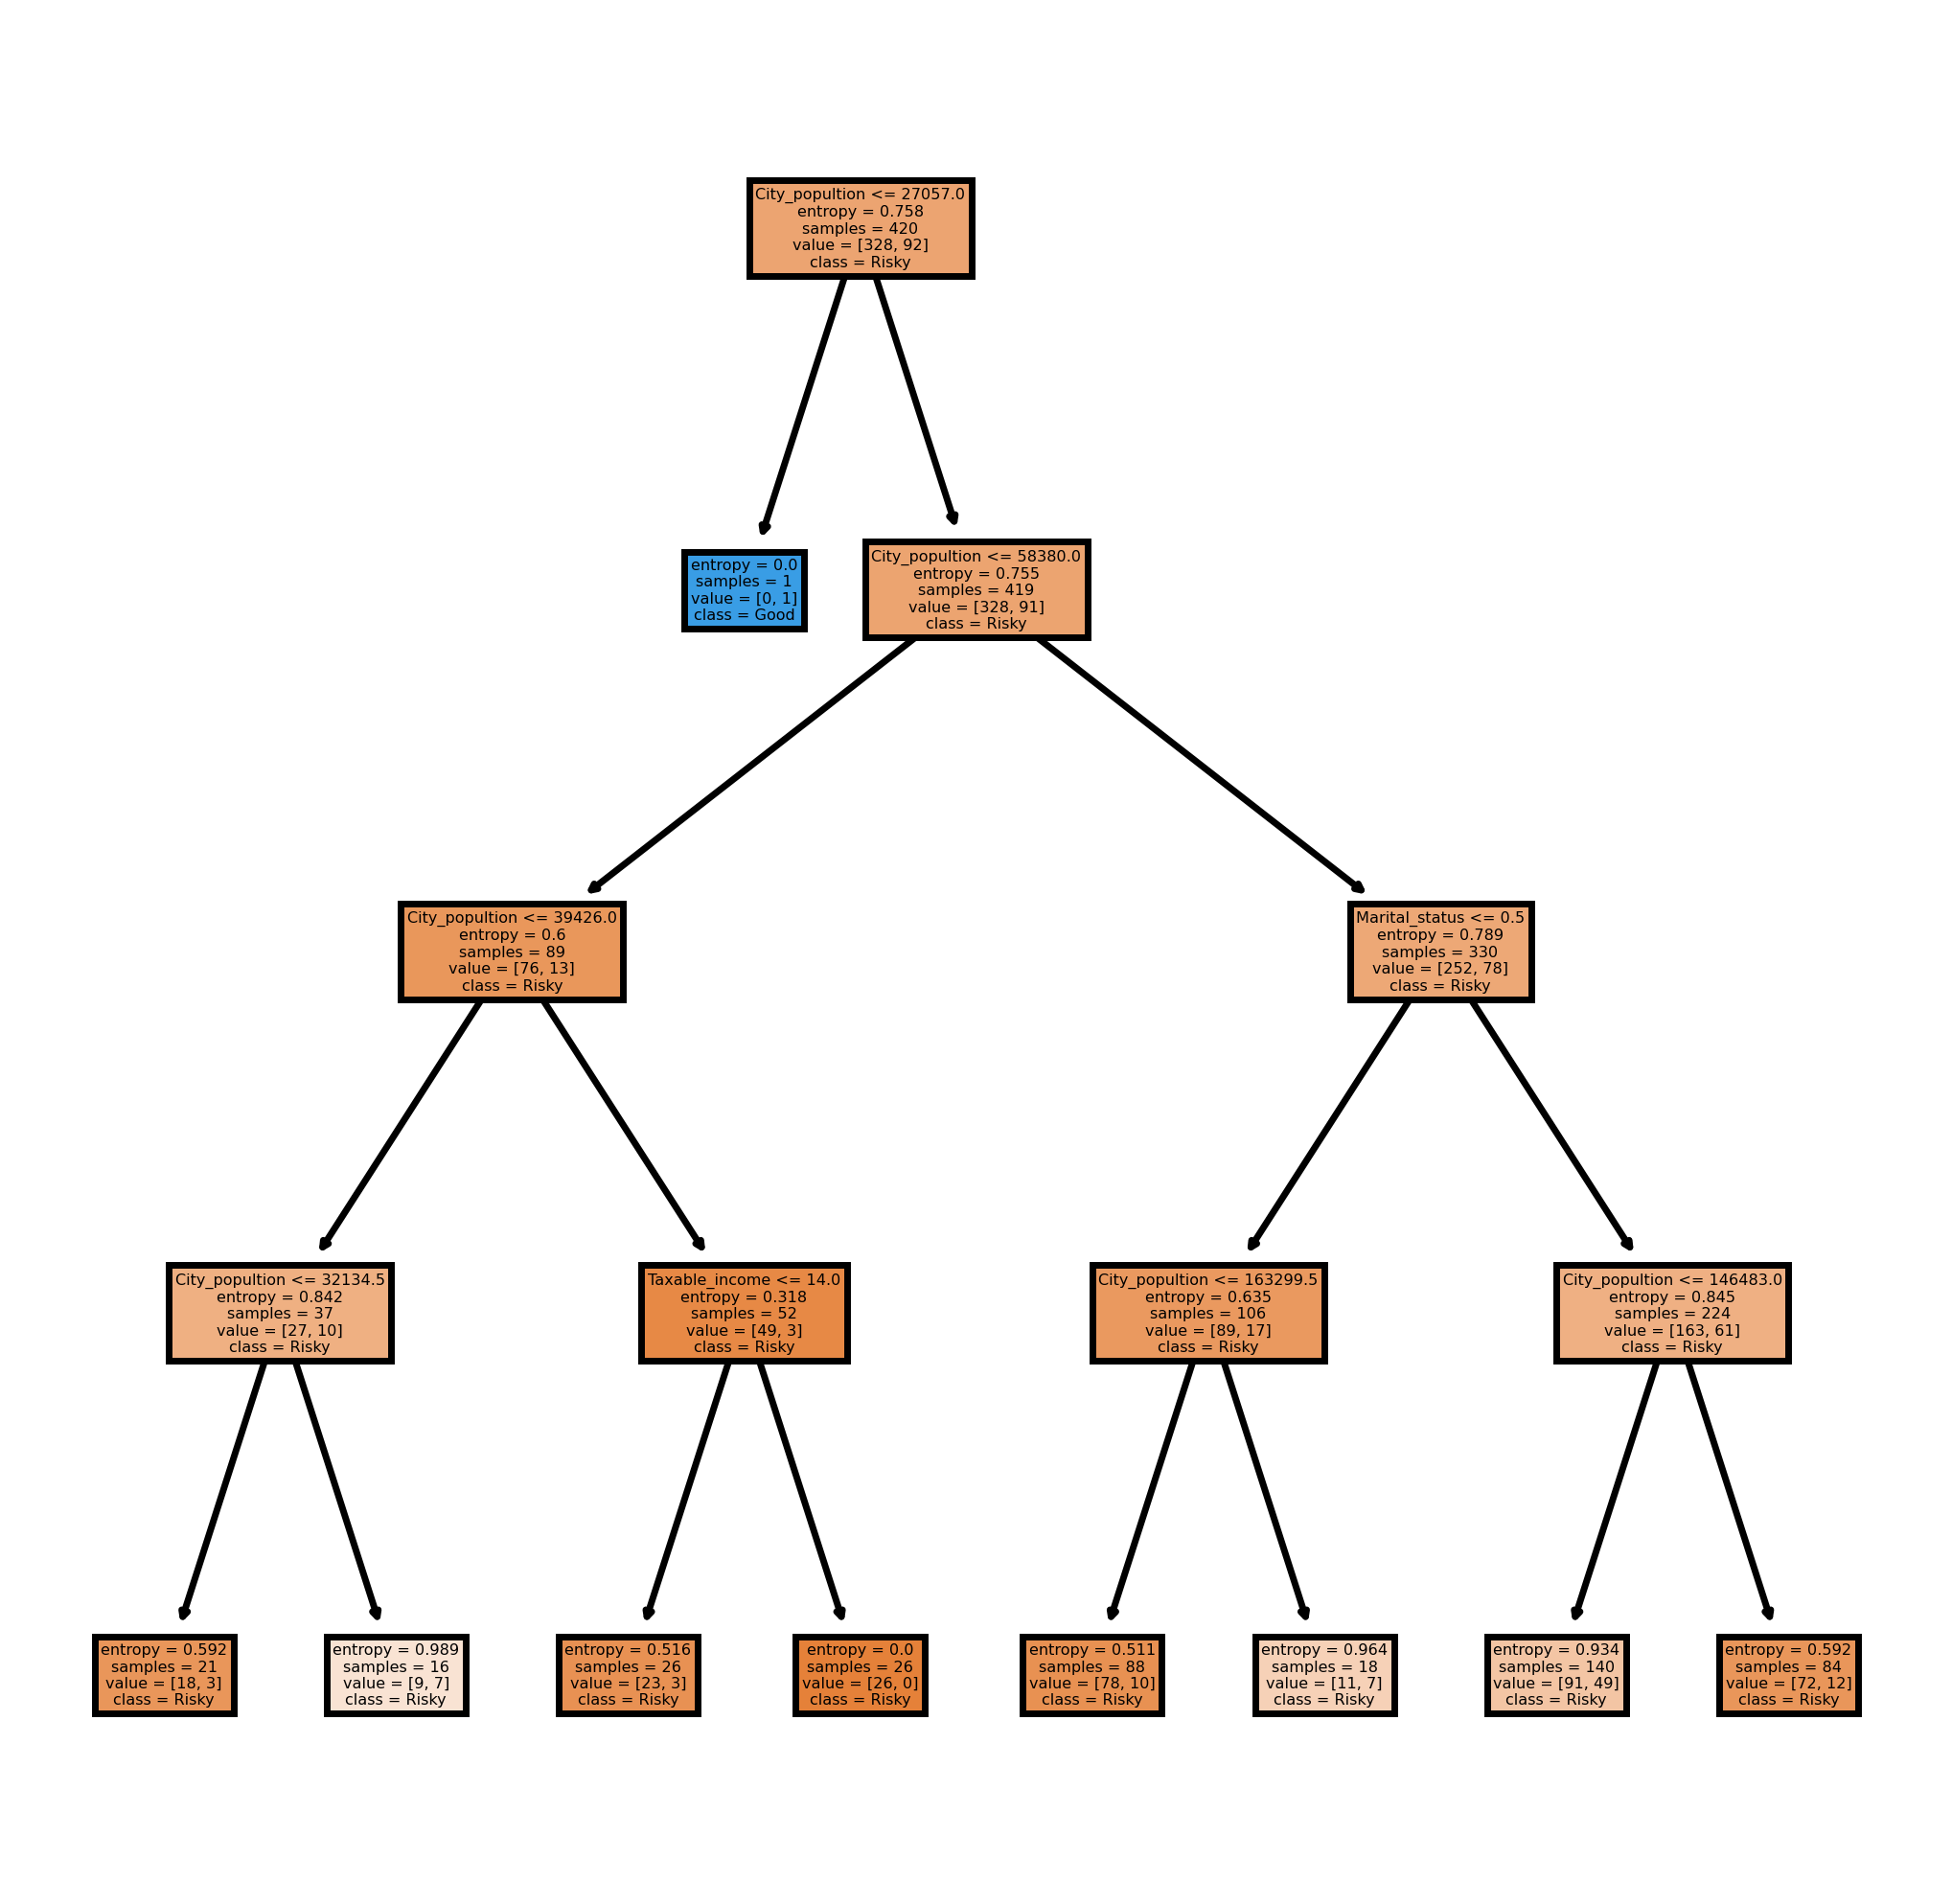

In [119]:
fn=['Undergrad','Marital_status','City_popultion','Taxable_income','Work_experience','Urban']
cn=['Risky','Good']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(5,5),dpi=500)
tree.plot_tree(model_c5,
              feature_names=fn,class_names=cn,
              filled=True);

In [120]:
#predicting data
preds=model_c5.predict(x_test)
pd.Series(preds).value_counts()

0    178
1      2
dtype: int64

In [121]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [122]:
# Creating cross tables for checking model
pd.crosstab(y_test,preds)

col_0,0,1
Taxable_income,,
0,146,2
1,32,0


In [123]:
# Checking accuracy of model
np.mean(preds==y_test)

0.8111111111111111

* Hence the accuracy of both algorithm is same.